# Customer Churn EDA & ML

### importing necessary libraries and reading the data 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("telco.csv")
df.head() 

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


### feature selection
##### focus on features that directly relate to customer behavior and satisfaction

In [4]:
df = df[["Customer ID", "Gender", "Age", "Under 30", "Senior Citizen", "Tenure in Months", "Contract", "Internet Service", "Avg Monthly Long Distance Charges", "Monthly Charge", "Total Charges", "Satisfaction Score", "CLTV" , 'Customer Status']]
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Tenure in Months,Contract,Internet Service,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Satisfaction Score,CLTV,Customer Status
0,8779-QRDMV,Male,78,No,Yes,1,Month-to-Month,Yes,0.00,39.65,39.65,3,5433,Churned
1,7495-OOKFY,Female,74,No,Yes,8,Month-to-Month,Yes,48.85,80.65,633.30,3,5302,Churned
2,1658-BYGOY,Male,71,No,Yes,18,Month-to-Month,Yes,11.33,95.45,1752.55,2,3179,Churned
3,4598-XLKNJ,Female,78,No,Yes,25,Month-to-Month,Yes,19.76,98.50,2514.50,2,5337,Churned
4,4846-WHAFZ,Female,80,No,Yes,37,Month-to-Month,Yes,6.33,76.50,2868.15,2,2793,Churned


In [5]:
df.shape

(7043, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Tenure in Months                   7043 non-null   int64  
 6   Contract                           7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Monthly Charge                     7043 non-null   float64
 10  Total Charges                      7043 non-null   float64
 11  Satisfaction Score                 7043 non-null   int64

In [7]:
df.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Tenure in Months                     0
Contract                             0
Internet Service                     0
Avg Monthly Long Distance Charges    0
Monthly Charge                       0
Total Charges                        0
Satisfaction Score                   0
CLTV                                 0
Customer Status                      0
dtype: int64

In [8]:
df.describe()

,Age,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Satisfaction Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,32.386767,22.958954,64.761692,2280.381264,3.244924,4400.295755
std,16.750352,24.542061,15.448113,30.090047,2266.220462,1.201657,1183.057152
min,19.000000,1.000000,0.000000,18.250000,18.800000,1.000000,2003.000000
25%,32.000000,9.000000,9.210000,35.500000,400.150000,3.000000,3469.000000
50%,46.000000,29.000000,22.890000,70.350000,1394.550000,3.000000,4527.000000
75%,60.000000,55.000000,36.395000,89.850000,3786.600000,4.000000,5380.500000
max,80.000000,72.000000,49.990000,118.750000,8684.800000,5.000000,6500.000000


### EDA 

In [9]:
numerical_df = df[["Age", 'Tenure in Months' ,'Avg Monthly Long Distance Charges' ,'Monthly Charge' ,'Total Charges' ,'Satisfaction Score' ,"CLTV"]]
numerical_df.head()

,Age,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Satisfaction Score,CLTV
0,78,1,0.00,39.65,39.65,3,5433
1,74,8,48.85,80.65,633.30,3,5302
2,71,18,11.33,95.45,1752.55,2,3179
3,78,25,19.76,98.50,2514.50,2,5337
4,80,37,6.33,76.50,2868.15,2,2793


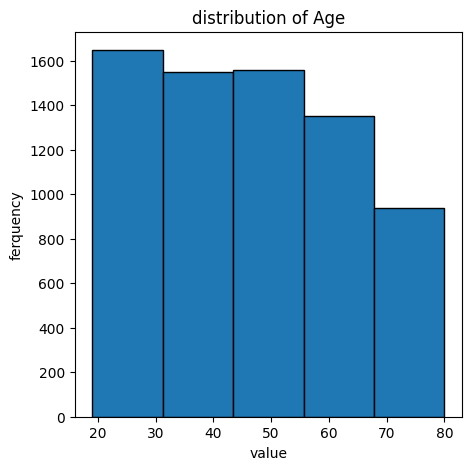

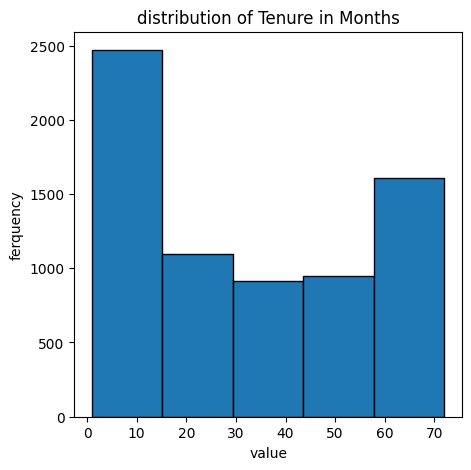

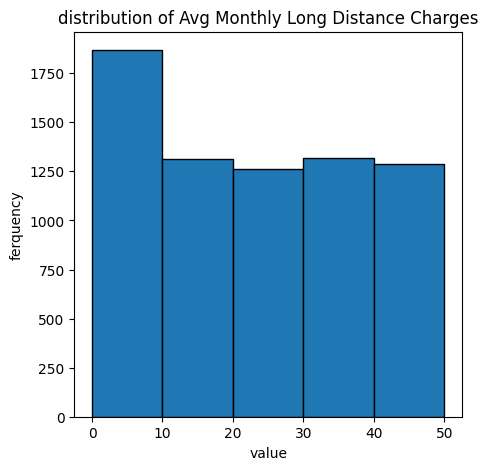

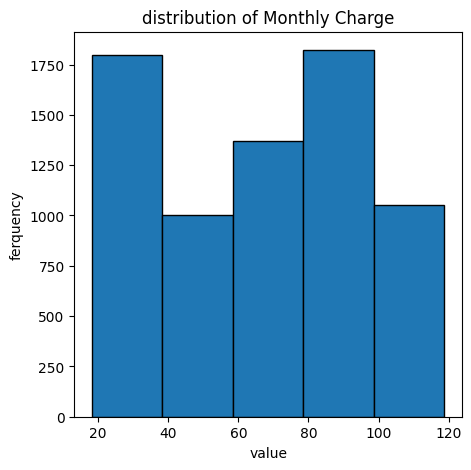

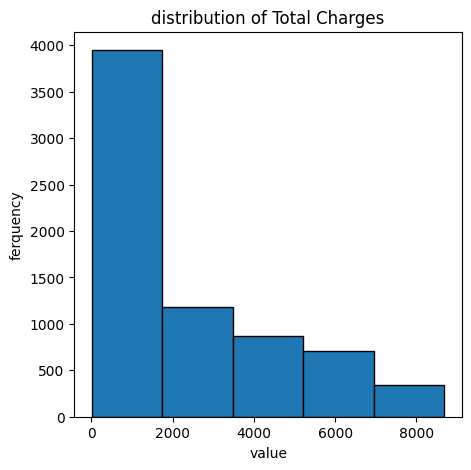

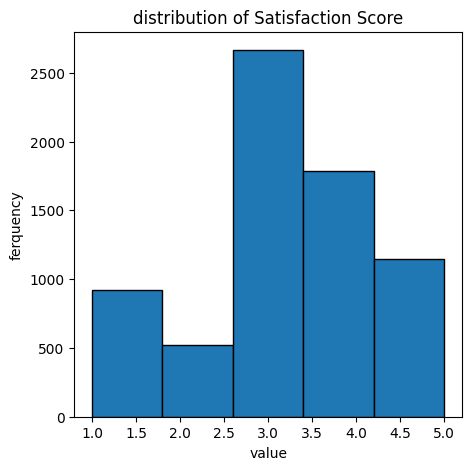

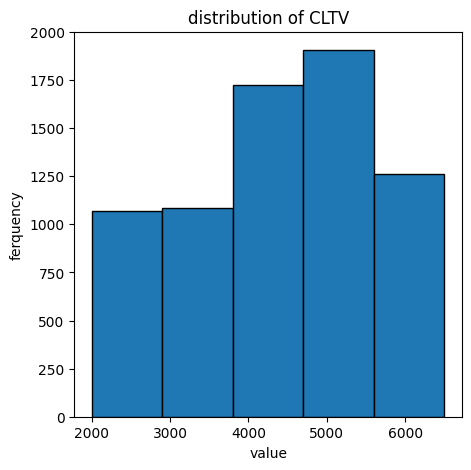

In [10]:
for data in numerical_df:
    plt.figure(figsize=(5,5))
    plt.hist(numerical_df[data] , bins=5 , edgecolor="black")
    plt.xlabel('value')
    plt.ylabel('ferquency')
    plt.title(f'distribution of {data}')
    plt.show

C:\Users\Badawy\AppData\Local\Temp\ipykernel_21072\1976148364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender' , data=df , palette='Set2')


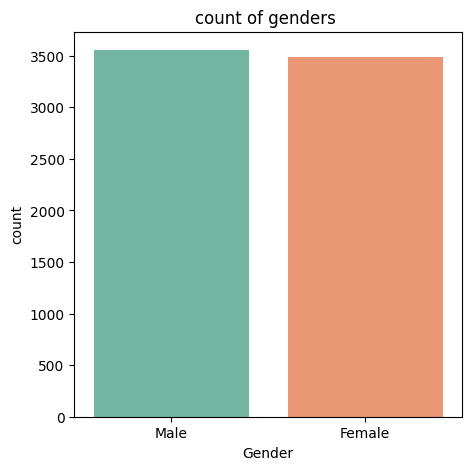

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender' , data=df , palette='Set2')
plt.title('count of genders ')
plt.show()

C:\Users\Badawy\AppData\Local\Temp\ipykernel_21072\2649161745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Status' , data=df , palette='Set2')


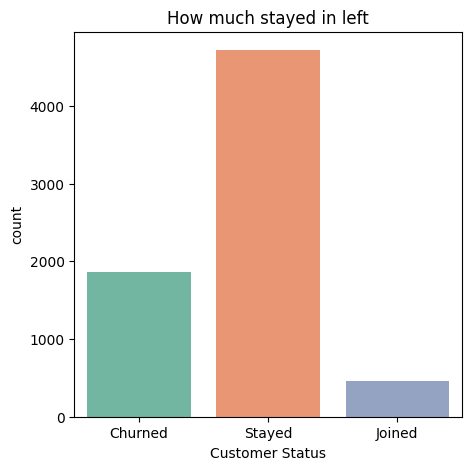

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='Customer Status' , data=df , palette='Set2')
plt.title('How much stayed in left')
plt.show()

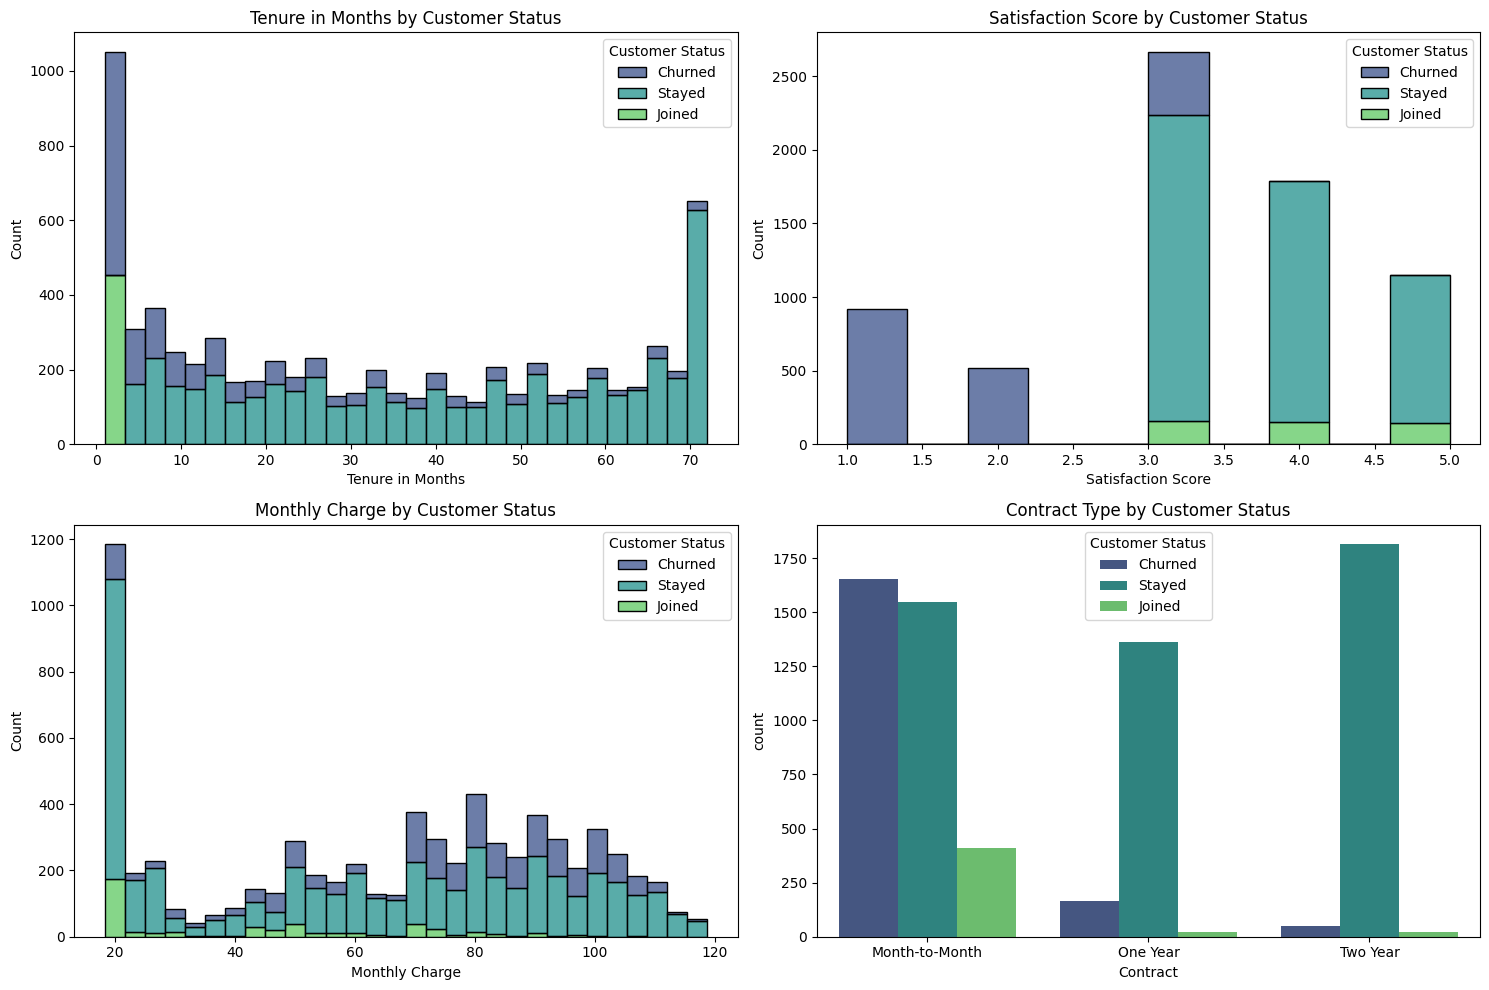

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df, x='Tenure in Months', hue='Customer Status', multiple='stack', bins=30, palette='viridis')
plt.title('Tenure in Months by Customer Status')

plt.subplot(2, 2, 2)
sns.histplot(df, x='Satisfaction Score', hue='Customer Status', multiple='stack', bins=10, palette='viridis')
plt.title('Satisfaction Score by Customer Status')

plt.subplot(2, 2, 3)
sns.histplot(df, x='Monthly Charge', hue='Customer Status', multiple='stack', bins=30, palette='viridis')
plt.title('Monthly Charge by Customer Status')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Contract', hue='Customer Status', palette='viridis')
plt.title('Contract Type by Customer Status')

plt.tight_layout()
plt.show()

In [14]:
data_cleaned = df.copy()

data_cleaned['Senior Citizen'] = data_cleaned['Senior Citizen'].map({'Yes': 1, 'No': 0})
data_cleaned['Under 30'] = data_cleaned['Under 30'].map({'Yes': 1, 'No': 0})

categorical_columns = ['Gender', 'Contract', 'Internet Service', 'Customer Status']
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].astype('category')

data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

In [16]:
target_column = 'Customer Status_Stayed'

X = data_encoded.drop(target_column, axis=1)
y = data_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)
y_pred_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9713458545464138


In [17]:
def predict(new_data):
    new_data_cleaned = new_data.copy()
    
    if 'Senior Citizen' in new_data_cleaned.columns:
        new_data_cleaned['Senior Citizen'] = new_data_cleaned['Senior Citizen'].map({'Yes': 1, 'No': 0})
    if 'Under 30' in new_data_cleaned.columns:
        new_data_cleaned['Under 30'] = new_data_cleaned['Under 30'].map({'Yes': 1, 'No': 0})
    
    for col in categorical_columns:
        if col in new_data_cleaned.columns:
            new_data_cleaned[col] = new_data_cleaned[col].astype('category')
    
    new_data_encoded = pd.get_dummies(new_data_cleaned, drop_first=True)
    
    new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)
    
    new_data_scaled = scaler.transform(new_data_encoded)
    
    predictions = log_reg_model.predict(new_data_scaled)
    
    return predictions




In [18]:
new_data ={
    'Gender': ['Female'],
    'Senior Citizen': ['No'],
    'Under 30': ['No'],
    'Contract': ['Month-to-month'],
    'Internet Service': ['Yes'],
    'Avg Monthly Long Distance Charges': [0.00],
    'Monthly Charge': [29.60],
    'Total Charges': [346.45],
    'Satisfaction Score': [1],
    'Tenure in Months': [11]
}

new_data_df =  pd.DataFrame(new_data)

predict(new_data_df)


array([False])

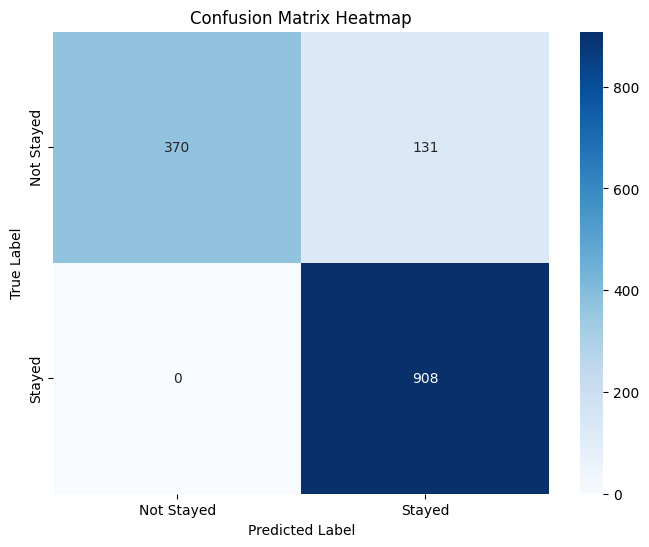

In [19]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Stayed', 'Stayed'], yticklabels=['Not Stayed', 'Stayed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


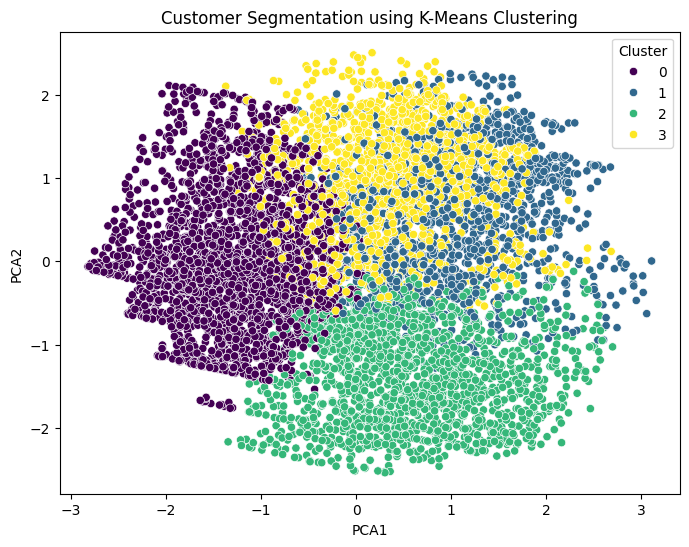

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

features_for_clustering = ['Age', 'Tenure in Months', 'Monthly Charge', 'Satisfaction Score']
data_clustering = data_cleaned[features_for_clustering]

scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clustering_scaled)
    sse.append(kmeans.inertia_)


optimal_clusters = 4 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_clustering_scaled)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clustering_scaled)
data_cleaned['PCA1'] = data_pca[:, 0]
data_cleaned['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_cleaned, palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.show()


C:\Users\Badawy\AppData\Local\Temp\ipykernel_21072\481504695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Status', y='CLTV', data=df, palette='viridis')


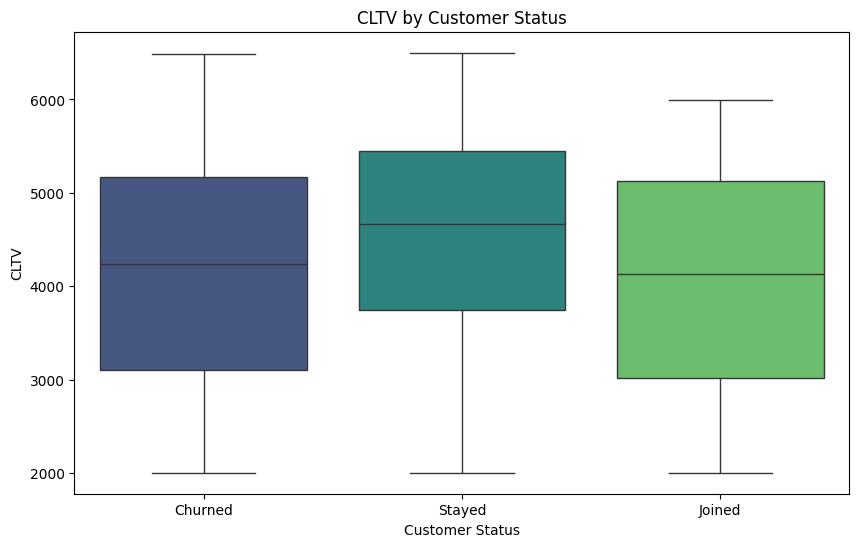

C:\Users\Badawy\AppData\Local\Temp\ipykernel_21072\481504695.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='CLTV', data=df, palette='viridis')


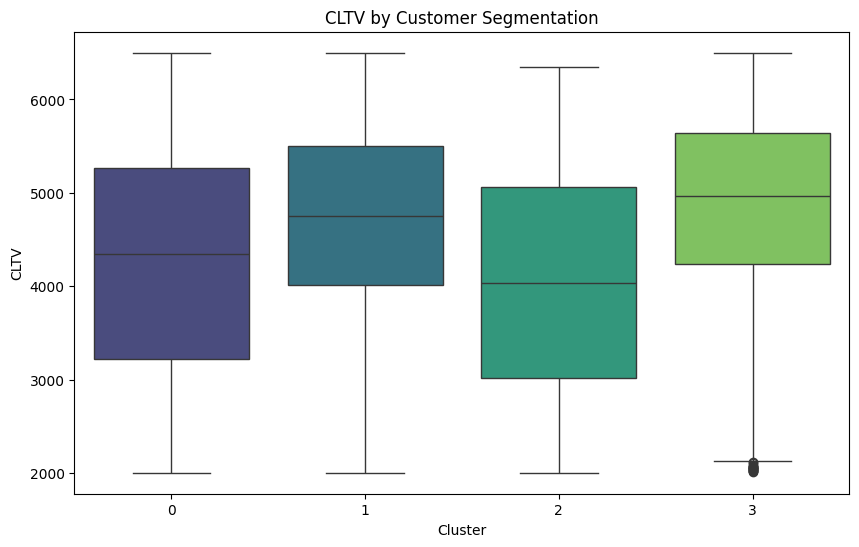

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Status', y='CLTV', data=df, palette='viridis')
plt.title('CLTV by Customer Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='CLTV', data=df, palette='viridis')
plt.title('CLTV by Customer Segmentation')
plt.show()
